In [150]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy import stats

## Exploratory Data Analysis:
### Individual's Features and Its Relationship with Surviving a Heart Failure
# 　



In [151]:
#import csv file
hf_data=pd.read_csv('hf_data_cleaned.csv')
del hf_data['Unnamed: 0']
hf_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [152]:
hf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


## 1. Anaemia

In [153]:
#calculate the number of people who had anaemia/did not have anaemia, and people who survived/did not survive
one=hf_data.loc[(hf_data['anaemia']==0) & (hf_data['DEATH_EVENT']==0),['anaemia','DEATH_EVENT']].count()[0]
two=hf_data.loc[(hf_data['anaemia']==0) & (hf_data['DEATH_EVENT']==1),['anaemia','DEATH_EVENT']].count()[0]
three=hf_data.loc[(hf_data['anaemia']==1) & (hf_data['DEATH_EVENT']==0),['anaemia','DEATH_EVENT']].count()[0]
four=hf_data.loc[(hf_data['anaemia']==1) & (hf_data['DEATH_EVENT']==1),['anaemia','DEATH_EVENT']].count()[0]
print(one,two,three,four)


120 50 83 46


120/203=.593 is the proportion of people that survived who did not have anaemia
50/96=.521 is the proportion of people that died who had anaemia

In [154]:
#define function that will calculate chi squared p-value 
def chi_squared_test(survive_with,die_with,survive_without,die_without):
    array= np.array([[survive_with,die_with],[survive_without,die_without]])
    return stats.chi2_contingency(array)

In [155]:
chi_squared_test(one,three,two,four)

(1.042175485287005,
 0.3073160508415107,
 1,
 array([[115.4180602,  87.5819398],
        [ 54.5819398,  41.4180602]]))

There is a 30.7% chance that a difference of such magnitude or greater was observed simply due to sampling variation; which is a very negligible difference. Therefore it seems safe to conclude that whether the patient had anaemia or not did not have a huge factor in the death event from a heart failure.

## 2. Age

In [156]:
#divide dataframe into those that died and those that survived from heart failure
hf_death=hf_data[hf_data['DEATH_EVENT']==1]
hf_survive=hf_data[hf_data['DEATH_EVENT']==0]

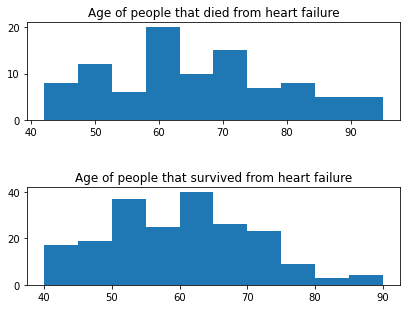

In [157]:
plt.subplot(2,1,1)
plt.tight_layout(h_pad=5)
plt.hist(hf_death['age'])
plt.title('Age of people that died from heart failure')
plt.subplot(2,1,2)
plt.hist(hf_survive['age'])
_=plt.title('Age of people that survived from heart failure')

It seems that the older the person, the likelier it is for the person to not survive from a heart failure, which is pretty natural.

## 3. CPK Level

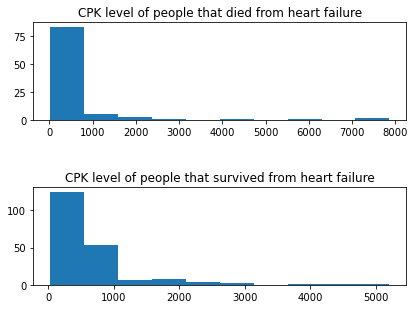

In [158]:
plt.subplot(2,1,1)
plt.tight_layout(h_pad=5)
plt.hist(hf_death['creatinine_phosphokinase'])
plt.title('CPK level of people that died from heart failure')
plt.subplot(2,1,2)
plt.hist(hf_survive['creatinine_phosphokinase'])
_=plt.title('CPK level of people that survived from heart failure')

There seem to be a few outlier of people who have CPK levels that are higher than 2000, and from the histogram it seems that a CPK level of 2000 and higher did not necessarily mean that the person would not survive; disregard these values to see a better picture.

Text(0.5, 1.0, 'CPK level(excluding 2000+) of people that survived from heart failure')

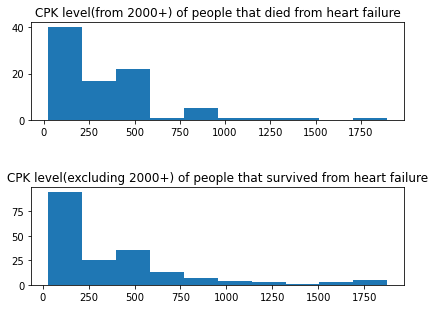

In [159]:
plt.subplot(2,1,1)
plt.tight_layout(h_pad=5)
plt.hist(hf_death.loc[hf_death['creatinine_phosphokinase']<2000,['creatinine_phosphokinase']].values)
plt.title('CPK level(from 2000+) of people that died from heart failure')
plt.subplot(2,1,2)
plt.hist(hf_survive.loc[(hf_survive['creatinine_phosphokinase']<2000),['creatinine_phosphokinase']].values)
plt.title('CPK level(excluding 2000+) of people that survived from heart failure')

There definitely seems to be plausible association between whether the person survives or not depending on the their CPK level.


## 4. Diabetes

In [160]:
one=hf_data.loc[(hf_data['diabetes']==0) & (hf_data['DEATH_EVENT']==0),['anaemia','DEATH_EVENT']].count()[0]
two=hf_data.loc[(hf_data['diabetes']==0) & (hf_data['DEATH_EVENT']==1),['anaemia','DEATH_EVENT']].count()[0]
three=hf_data.loc[(hf_data['diabetes']==1) & (hf_data['DEATH_EVENT']==0),['anaemia','DEATH_EVENT']].count()[0]
four=hf_data.loc[(hf_data['diabetes']==1) & (hf_data['DEATH_EVENT']==1),['anaemia','DEATH_EVENT']].count()[0]
print(one,two,three,four)

118 56 85 40


In [161]:
chi_squared_test(one,three,two,four)

(0.008458101537285573,
 0.9267235137291102,
 1,
 array([[118.13377926,  84.86622074],
        [ 55.86622074,  40.13377926]]))

With the p-value being .926, there seems to be no reason to suspect that diabetes has any say in whether a person will survive a heart attack or not.

## 5. Ejection Fraction

Text(0.5, 1.0, 'EF rate of people that survived from heart failure')

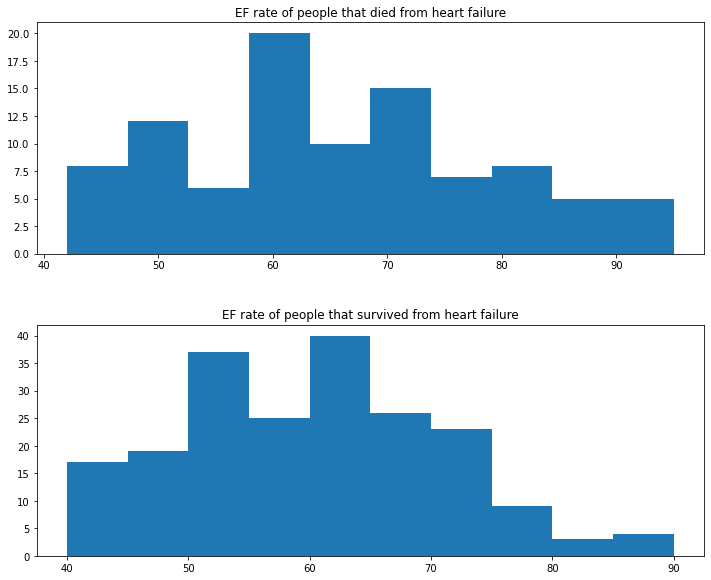

In [173]:
fig,axs = plt.subplots(2,1, figsize = (10,8))
plt.tight_layout(h_pad=5)
plt.subplot(2,1,1)
plt.hist(hf_death['age'])
plt.title('EF rate of people that died from heart failure')
plt.subplot(2,1,2)
plt.hist(hf_survive['age'])
plt.title('EF rate of people that survived from heart failure')

It seems safe to say that someone with an EF rate(the percentage of blood leaving the heart each time it contracts) of 70% or higher has a significantly smaller chance of surviving from a heart attack

## 6. Blood Pressure

In [163]:
one=hf_data.loc[(hf_data['high_blood_pressure']==0) & (hf_data['DEATH_EVENT']==0),['anaemia','DEATH_EVENT']].count()[0]
two=hf_data.loc[(hf_data['high_blood_pressure']==0) & (hf_data['DEATH_EVENT']==1),['anaemia','DEATH_EVENT']].count()[0]
three=hf_data.loc[(hf_data['high_blood_pressure']==1) & (hf_data['DEATH_EVENT']==0),['anaemia','DEATH_EVENT']].count()[0]
four=hf_data.loc[(hf_data['high_blood_pressure']==1) & (hf_data['DEATH_EVENT']==1),['anaemia','DEATH_EVENT']].count()[0]
print(one,two,three,four)

137 57 66 39


In [164]:
chi_squared_test(one,three,two,four)

(1.5434607612967581,
 0.21410341199416902,
 1,
 array([[131.71237458,  71.28762542],
        [ 62.28762542,  33.71237458]]))

There is about a 21% chance that a difference of such magnitude or greater will be observed simply due to sampling variation. Statistically there seems to be no problem; but there may be a practical difference between the two parameters.

## 7. Platelet Count

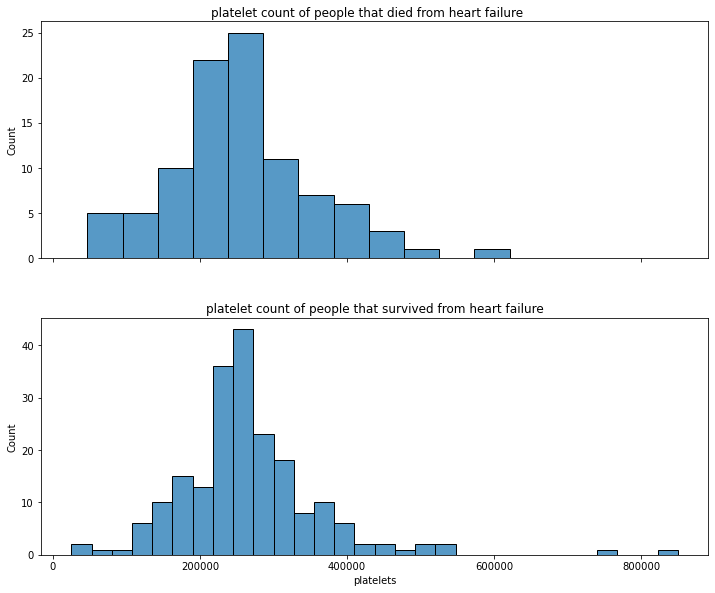

In [165]:
fig,axs = plt.subplots(2,1, figsize = (10,8), sharex=True)
plt.tight_layout(h_pad=5)
sns.histplot(hf_death['platelets'],ax = axs[0])
plt.suptitle("platelet count of people that died from heart failure",y=1)
sns.histplot(hf_survive['platelets'],ax = axs[1])
_=plt.title('platelet count of people that survived from heart failure')

Although there are a few outliers in platelet counts for both distributions, it clearly seems having a given platecount leads to a higher chance of surviving from a heart failure.

## 8. Serum Creatinine Level

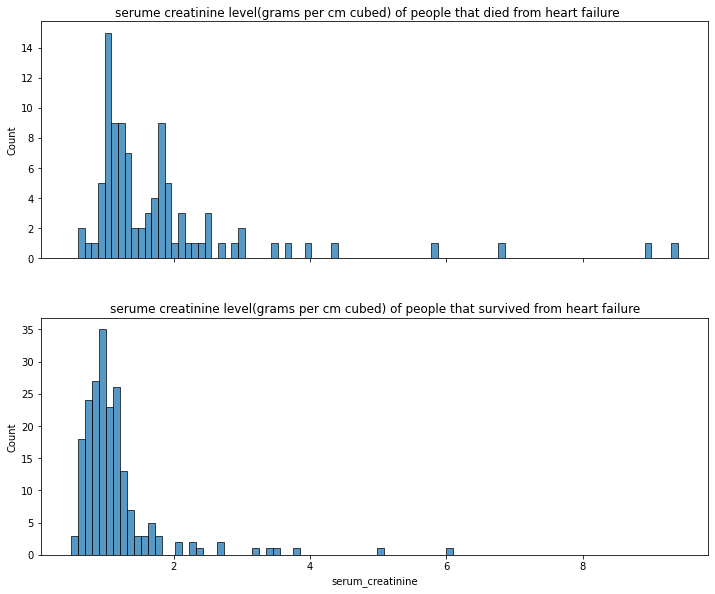

In [166]:
fig,axs = plt.subplots(2,1, figsize = (10,8), sharex=True)
plt.tight_layout(h_pad=5)
sns.histplot(hf_death['serum_creatinine'],bins=90,ax = axs[0])
plt.suptitle("serume creatinine level(grams per cm cubed) of people that died from heart failure",y=1)
sns.histplot(hf_survive['serum_creatinine'],ax = axs[1])
_=plt.title('serume creatinine level(grams per cm cubed) of people that survived from heart failure')

There are two interesting things to note. The first being that having a very low Serum Creatinine level seems to improve the chance of surviving a heart attack; and the second being that having a creatinine level of around 1.5 to 2 seens decreases the chance of survival. Judging from the nondifference in survival rates for creatinine levels of higher than 3, it seems that this result may simply be due to sampling variation, but it is worthwile to note their differences. 

## 9. Serum Sodium Level

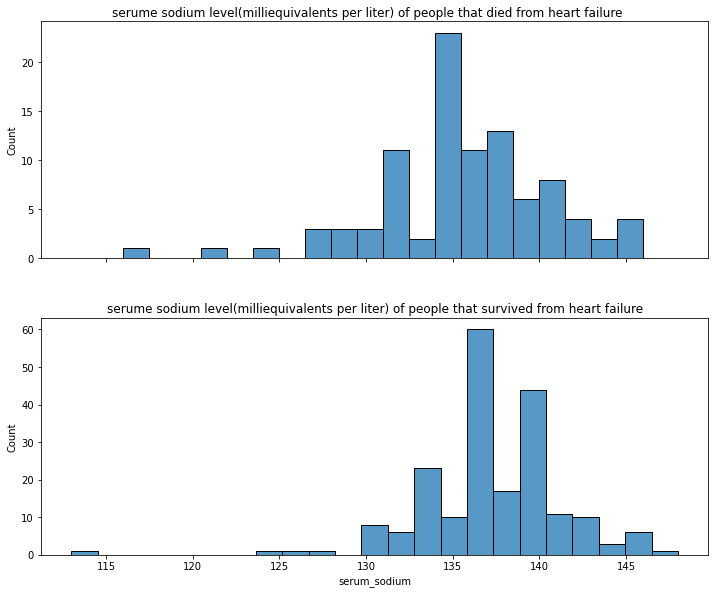

In [167]:
fig,axs = plt.subplots(2,1, figsize = (10,8), sharex=True)
plt.tight_layout(h_pad=5)
sns.histplot(hf_death['serum_sodium'],bins=20,ax = axs[0])
plt.suptitle("serume sodium level(milliequivalents per liter) of people that died from heart failure",y=1)
sns.histplot(hf_survive['serum_sodium'],ax = axs[1])
_=plt.title('serume sodium level(milliequivalents per liter) of people that survived from heart failure')

There is no notable difference between the two distributions.

## 10. Gender

In [168]:
one=hf_data.loc[(hf_data['sex']==0) & (hf_data['DEATH_EVENT']==0),['anaemia','DEATH_EVENT']].count()[0]
two=hf_data.loc[(hf_data['sex']==0) & (hf_data['DEATH_EVENT']==1),['anaemia','DEATH_EVENT']].count()[0]
three=hf_data.loc[(hf_data['sex']==1) & (hf_data['DEATH_EVENT']==0),['anaemia','DEATH_EVENT']].count()[0]
four=hf_data.loc[(hf_data['sex']==1) & (hf_data['DEATH_EVENT']==1),['anaemia','DEATH_EVENT']].count()[0]
print(one,two,three,four)

71 34 132 62


In [169]:
chi_squared_test(one,three,two,four)

(0.003037108721613983,
 0.9560508538247334,
 1,
 array([[ 71.28762542, 131.71237458],
        [ 33.71237458,  62.28762542]]))

It seems that gender does not have an impact on whether the person will survive a heart failure or not.

## 11.Smoking

In [170]:
one=hf_data.loc[(hf_data['smoking']==0) & (hf_data['DEATH_EVENT']==0),['anaemia','DEATH_EVENT']].count()[0]
two=hf_data.loc[(hf_data['smoking']==0) & (hf_data['DEATH_EVENT']==1),['anaemia','DEATH_EVENT']].count()[0]
three=hf_data.loc[(hf_data['smoking']==1) & (hf_data['DEATH_EVENT']==0),['anaemia','DEATH_EVENT']].count()[0]
four=hf_data.loc[(hf_data['smoking']==1) & (hf_data['DEATH_EVENT']==1),['anaemia','DEATH_EVENT']].count()[0]
print(one,two,three,four)

137 66 66 30


In [171]:
chi_squared_test(one,three,two,four)

(0.007331473567119502,
 0.9317652998235507,
 1,
 array([[137.82274247,  65.17725753],
        [ 65.17725753,  30.82274247]]))

Surprisingly, it seems that smoking does not have an impact on whether the person will survive a heart failure or not, although it may increase the chance of having a heart failure to begin with.

## 12. Conclusion

It was interesting to see that many of these features seemingly do not have a huge impact on whether a person will survive a heart failure or not. While we do not know how each feature interacts with other features to affect the survial rate, it is worth concluding that at least statistically speaking, these feature hardly affect your chance of survival as an individual feature.